# Chess games dataset

We define first the needed libraries.

In [1]:
import pandas as pd
import numpy as np

## Data set comprehension and cleaning

In [2]:
chess_data = pd.read_csv("raw_data/club_games_data.csv")
chess_data.head()

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


In [3]:
chess_data.shape

(66879, 14)

The 'pgn' column contains the recording of the game. The big question is how we can isolate the moves in the dataset. Tip: split the string according to '\n'

In [4]:
print(chess_data.loc[0,'pgn'])

[Event "Enjoyable games 2 - Round 1"]
[Site "Chess.com"]
[Date "2013.01.30"]
[Round "-"]
[White "-Amos-"]
[Black "miniman2804"]
[Result "1-0"]
[Tournament "https://www.chess.com/tournament/enjoyable-games-2"]
[CurrentPosition "r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22"]
[Timezone "UTC"]
[ECO "E22"]
[ECOUrl "https://www.chess.com/openings/Nimzo-Indian-Defense-Spielmann-Variation"]
[UTCDate "2013.01.30"]
[UTCTime "16:35:14"]
[WhiteElo "1708"]
[BlackElo "1608"]
[TimeControl "1/259200"]
[Termination "-Amos- won by checkmate"]
[StartTime "16:35:14"]
[EndDate "2013.02.01"]
[EndTime "18:14:48"]
[Link "https://www.chess.com/game/daily/64629816"]

1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0



The fen column might not be so interesting because of the 'pgn' column. To investigate further.

In [5]:
chess_data.loc[0,'fen']

'r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22'

Should we consider the type of game?

In [6]:
chess_data.rules.describe()

count     66879
unique        5
top       chess
freq      65778
Name: rules, dtype: object

We should anonymize the players. Let's remove their usernames and their IDs.

In [7]:
chess_data.drop(columns=['white_username', 'white_id', 'black_username', 'black_id'],inplace=True)
chess_data.head()

,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


In [8]:
chess_data['rules'].unique()

array(['chess', 'chess960', 'threecheck', 'crazyhouse', 'kingofthehill'],
      dtype=object)

We eliminate other types of plays.

In [9]:
chess_data = chess_data[chess_data['rules'] == 'chess'].copy()

In [10]:
chess_data.drop(columns=['rules'], inplace=True)

In [11]:
chess_data['white_result'].unique()

array(['win', 'checkmated', 'timeout', 'resigned', 'abandoned',
       'timevsinsufficient', 'repetition', 'insufficient', 'stalemate',
       'agreed', '50move'], dtype=object)

In [12]:
chess_data['black_result'].unique()

array(['checkmated', 'resigned', 'win', 'timeout', 'timevsinsufficient',
       'repetition', 'insufficient', 'stalemate', 'abandoned', 'agreed',
       '50move'], dtype=object)

In [13]:
chess_data['time_class'].unique()

array(['daily', 'rapid', 'bullet', 'blitz'], dtype=object)

After considering the different types of games, we remove 'timeout' and 'timevsinsufficient' results as they do not allow the full outcoming to be processed.

In [14]:
chess_data = chess_data[chess_data['white_result'] != 'timeout'].copy()

In [15]:
chess_data = chess_data[chess_data['white_result'] != 'timevsinsufficient'].copy()

In [16]:
chess_data = chess_data[chess_data['black_result'] != 'timeout'].copy()

In [17]:
chess_data = chess_data[chess_data['black_result'] != 'timevsinsufficientblack_result'].copy()

In [18]:
chess_data.shape

(45155, 9)

We also remove abandoned games as they indicate that the game did not occur in proper conditions.

In [19]:
chess_data = chess_data[chess_data['white_result'] != 'abandoned'].copy()

In [20]:
chess_data = chess_data[chess_data['black_result'] != 'abandoned'].copy()

In [21]:
chess_data.shape

(42327, 9)

The only results remaining contain fully played games.

In [22]:
chess_data['white_result'].unique()

array(['win', 'checkmated', 'resigned', 'repetition', 'insufficient',
       'stalemate', 'agreed', '50move'], dtype=object)

In [23]:
chess_data['black_result'].unique()

array(['checkmated', 'resigned', 'win', 'repetition', 'insufficient',
       'stalemate', 'agreed', '50move'], dtype=object)

We define a result classifying function (win, loss, or draw)

In [24]:
def outcome(result : str):
    if result in ['checkmated', 'resigned']:
        return 'loss'
    elif result in ['repetition', 'insufficient', 'stalemate', 'agreed', '50move']:
        return 'draw'
    else:
        return 'win'

At this point, we can remove one the two result columns as they have become redundant. We also apply the first transformation.

In [25]:
chess_data.drop(columns='black_result', inplace=True)
chess_data['white_result'] = chess_data['white_result'].apply(outcome)

In [26]:
chess_data.head()

,white_rating,black_rating,white_result,time_class,time_control,rated,fen,pgn
0,1708,1608,win,daily,1/259200,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,1726,1577,win,daily,1/172800,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,1727,842,win,daily,1/172800,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,819,1727,loss,daily,1/172800,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,1729,1116,win,daily,1/172800,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


As long as we can guarantee that games are fully played, the context does not matter.

In [27]:
chess_data.drop(columns=['time_class', 'time_control', 'rated'], inplace=True)

## Games scope analysis

Assuming that the odds calculator model will not contain any information but the board representation and the player who has to move, some columns will be removed because they cannot be used as input values. However, it is important to study them to establish the limits of the application.

In [28]:
chess_data.describe()

,white_rating,black_rating
count,42327.000000,42327.000000
mean,1266.055709,1264.762799
std,397.651855,396.870935
min,100.000000,100.000000
25%,1001.000000,999.000000
50%,1265.000000,1262.000000
75%,1537.000000,1536.000000
max,3172.000000,3172.000000


In [29]:
import seaborn as sns

### Players representation

/tmp/ipykernel_19026/2972450232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chess_data.white_rating)


<Axes: xlabel='white_rating', ylabel='Density'>

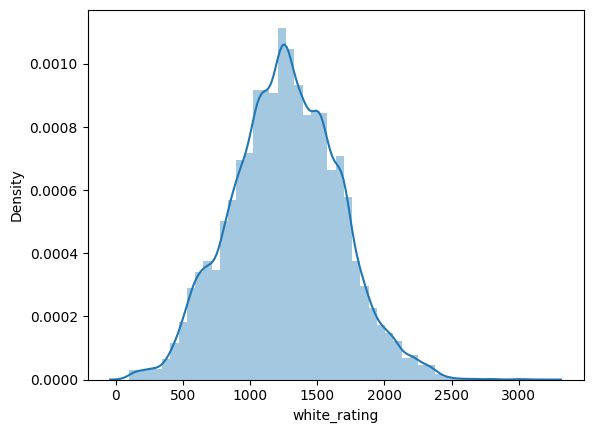

In [30]:
sns.distplot(chess_data.white_rating)

/tmp/ipykernel_19026/1792016657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chess_data.black_rating)


<Axes: xlabel='black_rating', ylabel='Density'>

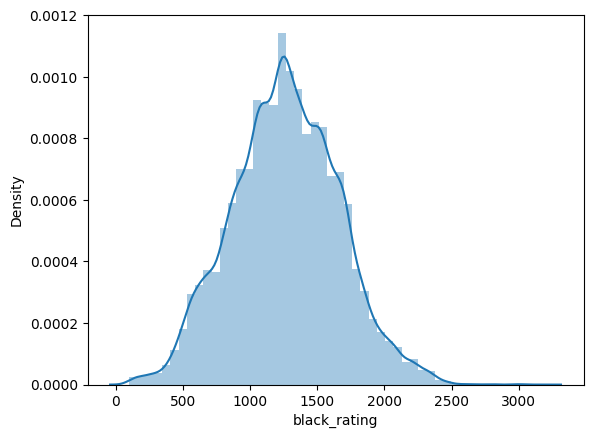

In [31]:
sns.distplot(chess_data.black_rating)

The player base appears as normally distributed around 1200-1300 elo rating. We will also need to ensure that the skill gap is not too skewed, as the upcoming model would not be able to learn from fair and closed games.

In [32]:
chess_data['skill_gap'] = chess_data.white_rating - chess_data.black_rating

/tmp/ipykernel_19026/3461862677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chess_data.skill_gap)


<Axes: xlabel='skill_gap', ylabel='Density'>

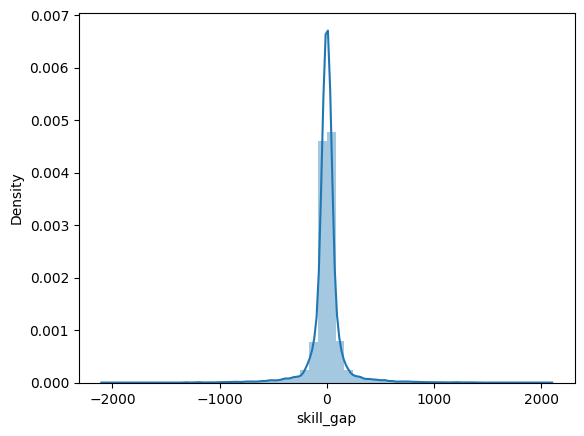

In [33]:
sns.distplot(chess_data.skill_gap)

In [34]:
chess_data.describe()

,white_rating,black_rating,skill_gap
count,42327.000000,42327.000000,42327.000000
mean,1266.055709,1264.762799,1.292910
std,397.651855,396.870935,157.718744
min,100.000000,100.000000,-2048.000000
25%,1001.000000,999.000000,-37.000000
50%,1265.000000,1262.000000,1.000000
75%,1537.000000,1536.000000,38.000000
max,3172.000000,3172.000000,2048.000000


The games look balanced according to player's levels. This allows us to define our target audience precisely.

### Results representation

To make sure that the model learns accurately and is not imbalanced, we need to check the games result distribution.

<Axes: xlabel='white_result', ylabel='Count'>

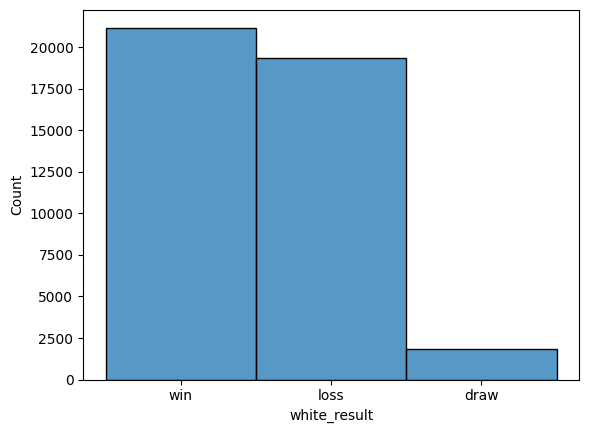

In [35]:
sns.histplot(chess_data.white_result)

We observe that the very big majority of games results in either a win or a loss. According to the graphical representation, draws seem to happen only around 5% of the time. Since draws are outlying results, we may need to choose between several ways of handling them:
- we still consider them as legitimate results, and we preprocessed the data to handle the imbalance
- we simply remove these results from the training dataset, and we focus on winning and losing games
- we notice that white players have a statistical advantage over black players because they move first, and we consider that black players obtaining a draw can actually count as their win.

#### Pros and cons of the first choice

The first choice keeps all the games together and does not oversimplify the chess rules. However, it looks nearly impossible to generate artificially drawing games to match the frequency of the other results. Furthermore, reducing the number of winning and losing games to match the drawing games is not a great idea either since too much information would be lost.

#### Pros and cons of the second choice

The second choice would be an easy simplification to reduce chess games to a binary outcomes. At first glance, the outliers do not represent too much lost information and it is a very intuitive choice. The issue here is that each game is unique and valuable because it may contain unknown tactics. We do not know if we can afford to lose this much information.

#### Pros and cons of the third choice

The third choice solves both the issues of imbalanced dataset and information loss, which seems ideal. The issue is that it simplifies even more chess rules as draw games are still legitimate results in chess.

## Input format research

Thanks to a dedicated chess library, we will define a way of generating useable input.

In [38]:
import chess

### Isolating FEN and PGN

In [39]:
chess_data.head()

,white_rating,black_rating,white_result,fen,pgn,skill_gap
0,1708,1608,win,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...",100
1,1726,1577,win,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...",149
2,1727,842,win,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",885
3,819,1727,loss,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",-908
4,1729,1116,win,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",613


Let us check the board representation in the FEN column. We know that the fourth row in the dataset is a checkmate situation, so we want to see if the fen column represents the board at the end of the game.

In [40]:
fen_test = chess_data["fen"][3]
fen_test

'r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 w kq - 3 17'

In [41]:
board_test = chess.Board(fen_test)
board_test.is_checkmate()

True

The fen column indicates the state of the board at the end of the game most probably. Since the PGN column contains all the moves played during the game, it is unnecessary to keep the fen column any longer.

In [42]:
chess_data.drop(columns=['fen'], inplace=True)

We try to work on the pgn column only now. Let's focus on the first game as an example to generalize.

In [43]:
pgn_test = chess_data['pgn'][0]
pgn_split = pgn_test.split("\n")
pgn_split

['[Event "Enjoyable games 2 - Round 1"]',
 '[Site "Chess.com"]',
 '[Date "2013.01.30"]',
 '[Round "-"]',
 '[White "-Amos-"]',
 '[Black "miniman2804"]',
 '[Result "1-0"]',
 '[Tournament "https://www.chess.com/tournament/enjoyable-games-2"]',
 '[CurrentPosition "r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22"]',
 '[Timezone "UTC"]',
 '[ECO "E22"]',
 '[ECOUrl "https://www.chess.com/openings/Nimzo-Indian-Defense-Spielmann-Variation"]',
 '[UTCDate "2013.01.30"]',
 '[UTCTime "16:35:14"]',
 '[WhiteElo "1708"]',
 '[BlackElo "1608"]',
 '[TimeControl "1/259200"]',
 '[Termination "-Amos- won by checkmate"]',
 '[StartTime "16:35:14"]',
 '[EndDate "2013.02.01"]',
 '[EndTime "18:14:48"]',
 '[Link "https://www.chess.com/game/daily/64629816"]',
 '',
 '1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. R

In [44]:
pgn_final = pgn_split[-2]
pgn_final

'1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0'

In [53]:
import io
import chess.pgn

In [73]:
pgn_format = io.StringIO(pgn_final)
game_test = chess.pgn.read_game(pgn_format)

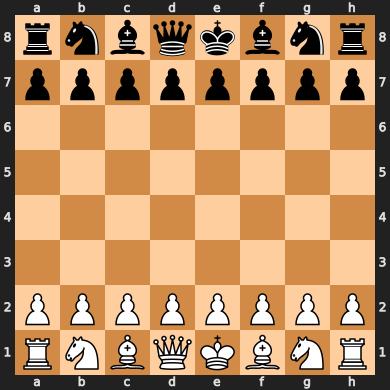

In [74]:
board_test = game_test.board()
board_test

In [75]:
moves = game_test.mainline_moves()

In [76]:
for move in moves:
    board_test.push(move)
    print(f"{board_test}\n\n")

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R


r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R


r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R


r n b q k b . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R


r n b q k b . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. . P P . . . .
. . N . . . . .
P P . . P P P P
R . B Q K B N R


r n b q k . . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. b P P . . . .
. . N . . . . .
P P . . P P P P
R . B Q K B N R


r n b q k . . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. b P P . . . .
. Q N . . . . .
P P . . P P P P
R . B . K B N R


r n b q k . . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. . P P . . . .
. Q b . . 